In [1]:
import pandas as pd
import numpy as np

import spacy
nlp = spacy.load('en_core_web_lg')

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import DBSCAN, MiniBatchKMeans, KMeans, Birch, AffinityPropagation
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import wordcloud
import string

In [2]:
course = pd.read_csv("./data/archive_1/udemy_course.csv", encoding="utf-8", index_col=0, sep=";")

In [3]:
course.head(10)


,course_name,subs,num_reviews,num_lectures,duration,last_update,publish_date,created_date,original_price,discount_price,level,label
course_id,,,,,,,,,,,,
8082,Ruby Programming for Beginners,28445,643,56,6.0,21/08/2019 00:00,08/07/2011 21:32,14/06/2011 16:09,1050000,182000.0,All Levels,Ruby
8203,Basic and Advanced HTML Lessons,1550,12,15,1.0,10/07/2017 00:00,20/06/2011 17:48,20/06/2011 19:59,350000,182000.0,All Levels,HTML
8319,Git Basics: In Theory and Practice,291,12,31,7.5,NaN,29/07/2011 20:24,28/06/2011 04:48,280000,182000.0,All Levels,Git
8324,Javascript for Beginners,3840,258,48,3.0,16/07/2019 00:00,09/07/2011 05:43,28/06/2011 08:26,280000,182000.0,All Levels,JavaScript
8325,HTML Tutorial: HTML & CSS for Beginners,12521,297,82,4.0,16/07/2019 00:00,09/09/2011 15:28,28/06/2011 08:27,280000,182000.0,All Levels,HTML
8416,Beginners - How To Create iPhone And iPad Apps...,2044,21,81,7.5,09/01/2017 00:00,06/07/2011 23:45,05/07/2011 19:40,700000,182000.0,All Levels,iOS Development
9463,Programming Java for Beginners - The Ultimate ...,54369,1144,114,10.0,09/01/2017 00:00,15/09/2011 15:19,03/09/2011 02:16,700000,182000.0,All Levels,Java
10321,Learn to Program with C++,3990,461,108,10.0,09/01/2017 00:00,14/10/2011 21:48,13/10/2011 02:42,700000,182000.0,All Levels,C
10620,Practical Transformation Using XSLT and XPath ...,789,123,71,24.0,NaN,28/10/2011 18:13,25/10/2011 05:00,2520000,630000.0,All Levels,XSLT


In [4]:
course.drop(["subs", "num_reviews", "num_lectures", "duration", "last_update", "publish_date", "created_date", "original_price", "discount_price"], axis=1, inplace=True)

In [5]:
course.dropna(inplace=True)

In [6]:
course.shape

(9229, 3)

In [7]:
# tokenize
course.head(10)

,course_name,level,label
course_id,,,
8082,Ruby Programming for Beginners,All Levels,Ruby
8203,Basic and Advanced HTML Lessons,All Levels,HTML
8319,Git Basics: In Theory and Practice,All Levels,Git
8324,Javascript for Beginners,All Levels,JavaScript
8325,HTML Tutorial: HTML & CSS for Beginners,All Levels,HTML
8416,Beginners - How To Create iPhone And iPad Apps...,All Levels,iOS Development
9463,Programming Java for Beginners - The Ultimate ...,All Levels,Java
10321,Learn to Program with C++,All Levels,C
10620,Practical Transformation Using XSLT and XPath ...,All Levels,XSLT


In [8]:
# tokenize
course['tokenized'] = course['course_name'].apply(lambda x: nlp(x))

In [9]:
course.head(10)

,course_name,level,label,tokenized
course_id,,,,
8082,Ruby Programming for Beginners,All Levels,Ruby,"(Ruby, Programming, for, Beginners)"
8203,Basic and Advanced HTML Lessons,All Levels,HTML,"(Basic, and, Advanced, HTML, Lessons)"
8319,Git Basics: In Theory and Practice,All Levels,Git,"(Git, Basics, :, In, Theory, and, Practice)"
8324,Javascript for Beginners,All Levels,JavaScript,"(Javascript, for, Beginners)"
8325,HTML Tutorial: HTML & CSS for Beginners,All Levels,HTML,"(HTML, Tutorial, :, HTML, &, CSS, for, Beginners)"
8416,Beginners - How To Create iPhone And iPad Apps...,All Levels,iOS Development,"(Beginners, -, How, To, Create, iPhone, And, i..."
9463,Programming Java for Beginners - The Ultimate ...,All Levels,Java,"(Programming, Java, for, Beginners, -, The, Ul..."
10321,Learn to Program with C++,All Levels,C,"(Learn, to, Program, with, C++)"
10620,Practical Transformation Using XSLT and XPath ...,All Levels,XSLT,"(Practical, Transformation, Using, XSLT, and, ..."


In [10]:
from spacy.lang.en.stop_words import STOP_WORDS
course['tokenized'] = course['tokenized'].apply(lambda x: [token.text for token in x if token.text not in STOP_WORDS])

In [11]:
course.head(10)

,course_name,level,label,tokenized
course_id,,,,
8082,Ruby Programming for Beginners,All Levels,Ruby,"[Ruby, Programming, Beginners]"
8203,Basic and Advanced HTML Lessons,All Levels,HTML,"[Basic, Advanced, HTML, Lessons]"
8319,Git Basics: In Theory and Practice,All Levels,Git,"[Git, Basics, :, In, Theory, Practice]"
8324,Javascript for Beginners,All Levels,JavaScript,"[Javascript, Beginners]"
8325,HTML Tutorial: HTML & CSS for Beginners,All Levels,HTML,"[HTML, Tutorial, :, HTML, &, CSS, Beginners]"
8416,Beginners - How To Create iPhone And iPad Apps...,All Levels,iOS Development,"[Beginners, -, How, To, Create, iPhone, And, i..."
9463,Programming Java for Beginners - The Ultimate ...,All Levels,Java,"[Programming, Java, Beginners, -, The, Ultimat..."
10321,Learn to Program with C++,All Levels,C,"[Learn, Program, C++]"
10620,Practical Transformation Using XSLT and XPath ...,All Levels,XSLT,"[Practical, Transformation, Using, XSLT, XPath..."


In [12]:
# clear - : from tokenized
course['tokenized'] = course['tokenized'].apply(lambda x: [token for token in x if token not in string.punctuation])

In [13]:
course.head(10)

,course_name,level,label,tokenized
course_id,,,,
8082,Ruby Programming for Beginners,All Levels,Ruby,"[Ruby, Programming, Beginners]"
8203,Basic and Advanced HTML Lessons,All Levels,HTML,"[Basic, Advanced, HTML, Lessons]"
8319,Git Basics: In Theory and Practice,All Levels,Git,"[Git, Basics, In, Theory, Practice]"
8324,Javascript for Beginners,All Levels,JavaScript,"[Javascript, Beginners]"
8325,HTML Tutorial: HTML & CSS for Beginners,All Levels,HTML,"[HTML, Tutorial, HTML, CSS, Beginners]"
8416,Beginners - How To Create iPhone And iPad Apps...,All Levels,iOS Development,"[Beginners, How, To, Create, iPhone, And, iPad..."
9463,Programming Java for Beginners - The Ultimate ...,All Levels,Java,"[Programming, Java, Beginners, The, Ultimate, ..."
10321,Learn to Program with C++,All Levels,C,"[Learn, Program, C++]"
10620,Practical Transformation Using XSLT and XPath ...,All Levels,XSLT,"[Practical, Transformation, Using, XSLT, XPath..."


In [14]:
# lowercase tokenized
course['tokenized'] = course['tokenized'].apply(lambda x: [token.lower() for token in x])

In [15]:
course.head(10)

,course_name,level,label,tokenized
course_id,,,,
8082,Ruby Programming for Beginners,All Levels,Ruby,"[ruby, programming, beginners]"
8203,Basic and Advanced HTML Lessons,All Levels,HTML,"[basic, advanced, html, lessons]"
8319,Git Basics: In Theory and Practice,All Levels,Git,"[git, basics, in, theory, practice]"
8324,Javascript for Beginners,All Levels,JavaScript,"[javascript, beginners]"
8325,HTML Tutorial: HTML & CSS for Beginners,All Levels,HTML,"[html, tutorial, html, css, beginners]"
8416,Beginners - How To Create iPhone And iPad Apps...,All Levels,iOS Development,"[beginners, how, to, create, iphone, and, ipad..."
9463,Programming Java for Beginners - The Ultimate ...,All Levels,Java,"[programming, java, beginners, the, ultimate, ..."
10321,Learn to Program with C++,All Levels,C,"[learn, program, c++]"
10620,Practical Transformation Using XSLT and XPath ...,All Levels,XSLT,"[practical, transformation, using, xslt, xpath..."


## Clustering models

### K-means clustering

In [16]:
vectorizer = TfidfVectorizer(min_df=2, max_df=0.9, ngram_range=(1, 3), stop_words='english')

In [17]:
course['clean_document'] = course['tokenized'].apply(lambda x: ' '.join(x))

In [18]:
course.head(10)

,course_name,level,label,tokenized,clean_document
course_id,,,,,
8082,Ruby Programming for Beginners,All Levels,Ruby,"[ruby, programming, beginners]",ruby programming beginners
8203,Basic and Advanced HTML Lessons,All Levels,HTML,"[basic, advanced, html, lessons]",basic advanced html lessons
8319,Git Basics: In Theory and Practice,All Levels,Git,"[git, basics, in, theory, practice]",git basics in theory practice
8324,Javascript for Beginners,All Levels,JavaScript,"[javascript, beginners]",javascript beginners
8325,HTML Tutorial: HTML & CSS for Beginners,All Levels,HTML,"[html, tutorial, html, css, beginners]",html tutorial html css beginners
8416,Beginners - How To Create iPhone And iPad Apps...,All Levels,iOS Development,"[beginners, how, to, create, iphone, and, ipad...",beginners how to create iphone and ipad apps z...
9463,Programming Java for Beginners - The Ultimate ...,All Levels,Java,"[programming, java, beginners, the, ultimate, ...",programming java beginners the ultimate java t...
10321,Learn to Program with C++,All Levels,C,"[learn, program, c++]",learn program c++
10620,Practical Transformation Using XSLT and XPath ...,All Levels,XSLT,"[practical, transformation, using, xslt, xpath...",practical transformation using xslt xpath 5 ho...


In [20]:
X = vectorizer.fit_transform(course['clean_document'])

In [21]:
features = vectorizer.transform(course['clean_document'])

In [39]:
cls = KMeans(n_clusters=300, random_state=0)

In [40]:
cls.fit(features)

KMeans(n_clusters=300, random_state=0)

In [24]:
course['cluster'] = cls.labels_

In [41]:
course.head(10)

,course_name,level,label,tokenized,clean_document,cluster
course_id,,,,,,
8082,Ruby Programming for Beginners,All Levels,Ruby,"[ruby, programming, beginners]",ruby programming beginners,231
8203,Basic and Advanced HTML Lessons,All Levels,HTML,"[basic, advanced, html, lessons]",basic advanced html lessons,221
8319,Git Basics: In Theory and Practice,All Levels,Git,"[git, basics, in, theory, practice]",git basics in theory practice,113
8324,Javascript for Beginners,All Levels,JavaScript,"[javascript, beginners]",javascript beginners,33
8325,HTML Tutorial: HTML & CSS for Beginners,All Levels,HTML,"[html, tutorial, html, css, beginners]",html tutorial html css beginners,129
8416,Beginners - How To Create iPhone And iPad Apps...,All Levels,iOS Development,"[beginners, how, to, create, iphone, and, ipad...",beginners how to create iphone and ipad apps z...,94
9463,Programming Java for Beginners - The Ultimate ...,All Levels,Java,"[programming, java, beginners, the, ultimate, ...",programming java beginners the ultimate java t...,176
10321,Learn to Program with C++,All Levels,C,"[learn, program, c++]",learn program c++,138
10620,Practical Transformation Using XSLT and XPath ...,All Levels,XSLT,"[practical, transformation, using, xslt, xpath...",practical transformation using xslt xpath 5 ho...,68


In [26]:
course.groupby('cluster').count()

,course_name,level,label,tokenized,clean_document
cluster,,,,,
0,80,80,80,80,80
1,45,45,45,45,45
2,159,159,159,159,159
3,135,135,135,135,135
4,7,7,7,7,7
...,...,...,...,...,...
245,9,9,9,9,9
246,19,19,19,19,19
247,13,13,13,13,13


In [42]:
# Recommend 5 most similar course
def recommend_course(course_name):
    course_name = nlp(course_name)
    course_name = [token.text for token in course_name if token.text not in STOP_WORDS]
    course_name = [token for token in course_name if token not in string.punctuation]
    clean_course_name = " ".join([token.lower() for token in course_name])
    course_name_vector = vectorizer.transform([clean_course_name])
    predicted_cluster = cls.predict(course_name_vector)[0]
    similar_courses = course[course['cluster'] == predicted_cluster]
    return similar_courses.sample(n=5, replace=True)

In [43]:
recommend_course('python')

,course_name,level,label,tokenized,clean_document,cluster
course_id,,,,,,
1100784,BenchMarking AVRO JSON ORC PARQUET FILE FORMATS,Beginner,Hadoop,"[benchmarking, avro, json, orc, parquet, file,...",benchmarking avro json orc parquet file formats,175
920126,JavaScript Dynamic Quiz Application from Scrat...,Beginner,JavaScript,"[javascript, dynamic, quiz, application, scrat...",javascript dynamic quiz application scratch js...,175
874842,How to use JavaScript Objects JSON AJAX explained,Beginner,AJAX,"[how, use, javascript, objects, json, ajax, ex...",how use javascript objects json ajax explained,175
874842,How to use JavaScript Objects JSON AJAX explained,Beginner,AJAX,"[how, use, javascript, objects, json, ajax, ex...",how use javascript objects json ajax explained,175
1587422,Complete JSON AJAX API Course - Beginner to Pr...,Beginner,AJAX,"[complete, json, ajax, api, course, beginner, ...",complete json ajax api course beginner profess...,175


In [44]:
recommend_course('machine learning')

,course_name,level,label,tokenized,clean_document,cluster
course_id,,,,,,
1355438,Ionic & Angular JS: Principles Of Mobile and W...,Beginner,Ionic,"[ionic, angular, js, principles, of, mobile, w...",ionic angular js principles of mobile web deve...,66
1069426,Angular 2 Web Development with TypeScript,Intermediate,Typescript,"[angular, 2, web, development, typescript]",angular 2 web development typescript,66
549064,Web Development Tools the Pros Use: Code Produ...,Beginner,Web Development,"[web, development, tools, pros, use, code, pro...",web development tools pros use code productivi...,66
1426718,Complete Responsive Web Development: 4 courses...,All Levels,Front End Web Development,"[complete, responsive, web, development, 4, co...",complete responsive web development 4 courses 1,66
870040,Learning Scala Web Development,Beginner,Scala,"[learning, scala, web, development]",learning scala web development,66


In [31]:
recommend_course('data science')

,course_name,level,label,tokenized,clean_document,cluster
course_id,,,,,,
1499990,Basic Statistics and Data Mining for Data Science,Beginner,Data Science,"[basic, statistics, data, mining, data, science]",basic statistics data mining data science,30
1781254,Introduction To Data Science Using R Programming,All Levels,Data Science,"[introduction, to, data, science, using, r, pr...",introduction to data science using r programming,30
1164440,Learning Path: Julia: Explore Data Science wit...,Beginner,Data Science,"[learning, path, julia, explore, data, science...",learning path julia explore data science julia,30
2016036,Python for Data Science,Beginner,Python,"[python, data, science]",python data science,30
1781254,Introduction To Data Science Using R Programming,All Levels,Data Science,"[introduction, to, data, science, using, r, pr...",introduction to data science using r programming,30


In [32]:
recommend_course('data analysis')

,course_name,level,label,tokenized,clean_document,cluster
course_id,,,,,,
1343064,Learning Path:Swift: Protocol-Oriented Program...,Beginner,Swift,"[learning, path, swift, protocol, oriented, pr...",learning path swift protocol oriented programming,23
1310712,Learning Path: OpenCV: Image Processing with O...,Beginner,OpenCV,"[learning, path, opencv, image, processing, op...",learning path opencv image processing opencv 3,23
1089456,Learning Path: Modern DevOps,Expert,DevOps,"[learning, path, modern, devops]",learning path modern devops,23
1310712,Learning Path: OpenCV: Image Processing with O...,Beginner,OpenCV,"[learning, path, opencv, image, processing, op...",learning path opencv image processing opencv 3,23
1291840,Learning Path: MongoDB: Backend Programming wi...,Expert,MongoDB,"[learning, path, mongodb, backend, programming...",learning path mongodb backend programming mongodb,23


In [33]:
recommend_course('web development')

,course_name,level,label,tokenized,clean_document,cluster
course_id,,,,,,
2334226,Internet and Web Development Fundamentals,Beginner,Web Development,"[internet, web, development, fundamentals]",internet web development fundamentals,66
2448610,CSS in Web Development in 2020,All Levels,CSS,"[css, web, development, 2020]",css web development 2020,66
1636712,Wordpress for Web Development,Intermediate,WordPress,"[wordpress, web, development]",wordpress web development,66
1894324,Django 2.1 - Python Web Development for Beginners,Beginner,Django,"[django, 2.1, python, web, development, beginn...",django 2.1 python web development beginners,66
1915388,How To Create Your Own Website (Web Development),Beginner,WordPress,"[how, to, create, your, own, website, web, dev...",how to create your own website web development,66


In [34]:
recommend_course('php')

,course_name,level,label,tokenized,clean_document,cluster
course_id,,,,,,
84918,Simple Contact Form with PHP,All Levels,PHP,"[simple, contact, form, php]",simple contact form php,0
472526,PHP for Beginners 2019 Part 1: every line of c...,Beginner,PHP,"[php, beginners, 2019, part, 1, line, code, ex...",php beginners 2019 part 1 line code explained,0
1137010,Complete Beginners Guide to Learning PHP,Beginner,PHP,"[complete, beginners, guide, learning, php]",complete beginners guide learning php,0
1896094,Programming a free business site from scratch ...,All Levels,PHP,"[programming, free, business, site, scratch, p...",programming free business site scratch php lang,0
249580,Understanding PHP Data Objects (PDO),Beginner,PHP,"[understanding, php, data, objects, pdo]",understanding php data objects pdo,0


In [35]:
recommend_course('.net')

,course_name,level,label,tokenized,clean_document,cluster
course_id,,,,,,
1620232,High Performance Applications with C++,Expert,C++,"[high, performance, applications, c++]",high performance applications c++,47
1767564,C# 7 and .NET Core Solutions,Intermediate,ASP.NET Core,"[c, 7, .net, core, solutions]",c 7 .net core solutions,47
2045744,C# and .NET Core for Beginners,Beginner,C#,"[c, .net, core, beginners]",c .net core beginners,47
1750978,.Net Core Implementation + Standard Libraries,Beginner,ASP.NET Core,"[.net, core, implementation, standard, libraries]",.net core implementation standard libraries,47
1597306,Learning Path: C++: High Performance applicati...,Beginner,C++,"[learning, path, c++, high, performance, appli...",learning path c++ high performance application...,47


In [38]:
recommend_course('go')

,course_name,level,label,tokenized,clean_document,cluster
course_id,,,,,,
616854,The Ultimate Data Manipulation Course using SA...,Intermediate,SAS,"[the, ultimate, data, manipulation, course, sa...",the ultimate data manipulation course sas prog...,6
2303174,3Ds Max Game Modeling: Complete 3D Modeling in...,All Levels,3ds Max,"[3ds, max, game, modeling, complete, 3d, model...",3ds max game modeling complete 3d modeling 3ds...,6
1767160,Dynamic Programming - I,All Levels,Dynamic Programming,"[dynamic, programming, i]",dynamic programming i,6
2291985,Learning to use the Arduino IoT Cloud to build...,Beginner,Internet Of Things,"[learning, use, arduino, iot, cloud, build, io...",learning use arduino iot cloud build iot projects,6
939452,How to solve the logic puzzles on IT interviews?,All Levels,Interviewing Skills,"[how, solve, logic, puzzles, it, interviews]",how solve logic puzzles it interviews,6


In [ ]:
from joblib import dump, load
dump(cls, 'kmeans.joblib')
dump(vectorizer, 'vectorizer.joblib')
# export data to csv
course.to_csv('kmeans.csv', sep=';', encoding='utf-8')

### Affinity propagation clustering

In [ ]:
cls = AffinityPropagation(damping=0.5, max_iter=300, convergence_iter=20, copy=True, preference=None, affinity='euclidean', verbose=False)

In [ ]:
cls.fit(features)

In [ ]:
course['cluster'] = cls.labels_

In [ ]:
course.groupby('cluster').count()

In [ ]:
recommend_course('python')

In [ ]:
recommend_course('machine learning')

In [ ]:
recommend_course('data science')

In [ ]:
recommend_course('php')

### MiniBatchKMeans clustering

In [ ]:
cls = MiniBatchKMeans(n_clusters=500, random_state=0)

In [ ]:
cls.fit(features)

In [ ]:
course['cluster'] = cls.labels_

In [ ]:
course.groupby('cluster').count()

In [ ]:
recommend_course('python')

In [ ]:
recommend_course('machine learning')

In [ ]:
recommend_course('data science')

In [ ]:
recommend_course('web development')

### Birch clustering

In [ ]:
cls = Birch(n_clusters=500, threshold=0.5, branching_factor=50, compute_labels=True, copy=True)

In [ ]:
cls.fit(features)

In [ ]:
course['cluster'] = cls.labels_

In [ ]:
cls.predict(features)

#### Clustering on a 2D dataset

In [ ]:
pca = PCA(n_components=2)

In [ ]:
reduced_features = pca.fit_transform(features.toarray())

In [ ]:
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=cls.labels_)

#### Metrics for clustering

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score(features, labels=cls.predict(features))

In [ ]:
from sklearn.metrics import homogeneity_score
homogeneity_score(course.label, cls.predict(features))

In [ ]:
from sklearn.metrics import completeness_score
completeness_score(course.label, cls.predict(features))

#### Recommendations

In [ ]:
recommend_course('python')

In [ ]:
recommend_course('machine learning')

In [ ]:
recommend_course('data science')

In [ ]:
recommend_course('web development')

In [ ]:
recommend_course('computer vision')

In [ ]:
from joblib import dump, load
dump(cls, 'kmeans.joblib')

In [85]:
course = pd.read_csv("./data/archive_1/udemy_course.csv", encoding="utf-8", index_col=0, sep=";")

In [88]:
course.head(10)


,course_name,subs,num_reviews,num_lectures,duration,last_update,publish_date,created_date,original_price,discount_price,level,label
course_id,,,,,,,,,,,,
8082,Ruby Programming for Beginners,28445,643,56,6.0,21/08/2019 00:00,08/07/2011 21:32,14/06/2011 16:09,1050000,182000.0,All Levels,Ruby
8203,Basic and Advanced HTML Lessons,1550,12,15,1.0,10/07/2017 00:00,20/06/2011 17:48,20/06/2011 19:59,350000,182000.0,All Levels,HTML
8319,Git Basics: In Theory and Practice,291,12,31,7.5,NaN,29/07/2011 20:24,28/06/2011 04:48,280000,182000.0,All Levels,Git
8324,Javascript for Beginners,3840,258,48,3.0,16/07/2019 00:00,09/07/2011 05:43,28/06/2011 08:26,280000,182000.0,All Levels,JavaScript
8325,HTML Tutorial: HTML & CSS for Beginners,12521,297,82,4.0,16/07/2019 00:00,09/09/2011 15:28,28/06/2011 08:27,280000,182000.0,All Levels,HTML
8416,Beginners - How To Create iPhone And iPad Apps...,2044,21,81,7.5,09/01/2017 00:00,06/07/2011 23:45,05/07/2011 19:40,700000,182000.0,All Levels,iOS Development
9463,Programming Java for Beginners - The Ultimate ...,54369,1144,114,10.0,09/01/2017 00:00,15/09/2011 15:19,03/09/2011 02:16,700000,182000.0,All Levels,Java
10321,Learn to Program with C++,3990,461,108,10.0,09/01/2017 00:00,14/10/2011 21:48,13/10/2011 02:42,700000,182000.0,All Levels,C
10620,Practical Transformation Using XSLT and XPath ...,789,123,71,24.0,NaN,28/10/2011 18:13,25/10/2011 05:00,2520000,630000.0,All Levels,XSLT


In [5]:
course.drop(["subs", "num_reviews", "num_lectures", "duration", "last_update", "publish_date", "created_date", "original_price", "discount_price"], axis=1, inplace=True)

In [6]:
course.dropna(inplace=True)

In [7]:
course.shape

(9229, 3)

In [8]:
# tokenize
course.head(10)

,course_name,level,label
course_id,,,
8082,Ruby Programming for Beginners,All Levels,Ruby
8203,Basic and Advanced HTML Lessons,All Levels,HTML
8319,Git Basics: In Theory and Practice,All Levels,Git
8324,Javascript for Beginners,All Levels,JavaScript
8325,HTML Tutorial: HTML & CSS for Beginners,All Levels,HTML
8416,Beginners - How To Create iPhone And iPad Apps...,All Levels,iOS Development
9463,Programming Java for Beginners - The Ultimate ...,All Levels,Java
10321,Learn to Program with C++,All Levels,C
10620,Practical Transformation Using XSLT and XPath ...,All Levels,XSLT


In [9]:
# tokenize
course['tokenized'] = course['course_name'].apply(lambda x: nlp(x))

In [10]:
from spacy.lang.en.stop_words import STOP_WORDS
course['tokenized'] = course['tokenized'].apply(lambda x: [token.text for token in x if token.text not in STOP_WORDS])

In [11]:
# clear - : from tokenized
course['tokenized'] = course['tokenized'].apply(lambda x: [token for token in x if token not in string.punctuation])

In [12]:
# lowercase tokenized
course['tokenized'] = course['tokenized'].apply(lambda x: [token.lower() for token in x])

In [13]:
course.head(10)

,course_name,level,label,tokenized
course_id,,,,
8082,Ruby Programming for Beginners,All Levels,Ruby,"[ruby, programming, beginners]"
8203,Basic and Advanced HTML Lessons,All Levels,HTML,"[basic, advanced, html, lessons]"
8319,Git Basics: In Theory and Practice,All Levels,Git,"[git, basics, in, theory, practice]"
8324,Javascript for Beginners,All Levels,JavaScript,"[javascript, beginners]"
8325,HTML Tutorial: HTML & CSS for Beginners,All Levels,HTML,"[html, tutorial, html, css, beginners]"
8416,Beginners - How To Create iPhone And iPad Apps...,All Levels,iOS Development,"[beginners, how, to, create, iphone, and, ipad..."
9463,Programming Java for Beginners - The Ultimate ...,All Levels,Java,"[programming, java, beginners, the, ultimate, ..."
10321,Learn to Program with C++,All Levels,C,"[learn, program, c++]"
10620,Practical Transformation Using XSLT and XPath ...,All Levels,XSLT,"[practical, transformation, using, xslt, xpath..."


## Clustering models

### K-means clustering

In [60]:
vectorizer = TfidfVectorizer(min_df=2, max_df=0.9, ngram_range=(1, 3), stop_words='english')

In [61]:
course['clean_document'] = course['tokenized'].apply(lambda x: ' '.join(x))

In [62]:
X = vectorizer.fit_transform(course['clean_document'])

In [63]:
features = vectorizer.transform(course['clean_document'])

In [64]:
cls = KMeans(n_clusters=250, random_state=0)

In [65]:
cls.fit(features)

KMeans(n_clusters=250, random_state=0)

In [66]:
course['cluster'] = cls.labels_

In [67]:
course.head(10)

,course_name,level,label,tokenized,clean_document,cluster
course_id,,,,,,
8082,Ruby Programming for Beginners,All Levels,Ruby,"[ruby, programming, beginners]",ruby programming beginners,231
8203,Basic and Advanced HTML Lessons,All Levels,HTML,"[basic, advanced, html, lessons]",basic advanced html lessons,221
8319,Git Basics: In Theory and Practice,All Levels,Git,"[git, basics, in, theory, practice]",git basics in theory practice,113
8324,Javascript for Beginners,All Levels,JavaScript,"[javascript, beginners]",javascript beginners,33
8325,HTML Tutorial: HTML & CSS for Beginners,All Levels,HTML,"[html, tutorial, html, css, beginners]",html tutorial html css beginners,129
8416,Beginners - How To Create iPhone And iPad Apps...,All Levels,iOS Development,"[beginners, how, to, create, iphone, and, ipad...",beginners how to create iphone and ipad apps z...,94
9463,Programming Java for Beginners - The Ultimate ...,All Levels,Java,"[programming, java, beginners, the, ultimate, ...",programming java beginners the ultimate java t...,176
10321,Learn to Program with C++,All Levels,C,"[learn, program, c++]",learn program c++,138
10620,Practical Transformation Using XSLT and XPath ...,All Levels,XSLT,"[practical, transformation, using, xslt, xpath...",practical transformation using xslt xpath 5 ho...,68


In [68]:
course.groupby('cluster').count()

,course_name,level,label,tokenized,clean_document
cluster,,,,,
0,80,80,80,80,80
1,45,45,45,45,45
2,159,159,159,159,159
3,135,135,135,135,135
4,7,7,7,7,7
...,...,...,...,...,...
245,9,9,9,9,9
246,19,19,19,19,19
247,13,13,13,13,13


In [69]:
# Recommend 5 most similar course
def recommend_course(course_name):
    course_name = nlp(course_name)
    course_name = [token.text for token in course_name if token.text not in STOP_WORDS]
    course_name = [token for token in course_name if token not in string.punctuation]
    clean_course_name = " ".join([token.lower() for token in course_name])
    course_name_vector = vectorizer.transform([clean_course_name])
    predicted_cluster = cls.predict(course_name_vector)[0]
    similar_courses = course[course['cluster'] == predicted_cluster]
    return similar_courses.sample(n=5, replace=True)

In [70]:
recommend_course('python')

,course_name,level,label,tokenized,clean_document,cluster
course_id,,,,,,
2380762,Python The Quickest Way: Python Essentials Cou...,All Levels,Python,"[python, the, quickest, way, python, essential...",python the quickest way python essentials cour...,3
1933200,Building Trading Algorithms with Python,Intermediate,Python,"[building, trading, algorithms, python]",building trading algorithms python,3
1094688,Superb Python Course - Become Certified Python...,Intermediate,Python,"[superb, python, course, become, certified, py...",superb python course become certified python d...,3
2097544,Python Concurrency Simplified,Intermediate,Concurrency,"[python, concurrency, simplified]",python concurrency simplified,3
1554464,Python for Sorting and Searching : With Interv...,Intermediate,Interviewing Skills,"[python, sorting, searching, with, interview, ...",python sorting searching with interview riddles,3


In [71]:
recommend_course('machine learning')

,course_name,level,label,tokenized,clean_document,cluster
course_id,,,,,,
1631000,The Complete TensorFlow Masterclass: Machine L...,Beginner,Deep Learning,"[the, complete, tensorflow, masterclass, machi...",the complete tensorflow masterclass machine le...,52
2019678,Machine Learning With TensorFlow: The Practica...,All Levels,TensorFlow,"[machine, learning, with, tensorflow, the, pra...",machine learning with tensorflow the practical...,52
1915334,Decision Trees for Machine Learning From Scratch,Beginner,Machine Learning,"[decision, trees, machine, learning, from, scr...",decision trees machine learning from scratch,52
2452496,Spark Machine Learning Project (House Sale Pri...,All Levels,Apache Spark,"[spark, machine, learning, project, house, sal...",spark machine learning project house sale pric...,52
1950994,Android P with Machine Learning apps - 26+ pro...,All Levels,Android Development,"[android, p, machine, learning, apps, 26, proj...",android p machine learning apps 26 projects total,52


In [72]:
recommend_course('data science')

,course_name,level,label,tokenized,clean_document,cluster
course_id,,,,,,
1951666,SAS for Data Science,All Levels,SAS,"[sas, data, science]",sas data science,30
860434,Julia for Data Science,Beginner,Julia Programming Language,"[julia, data, science]",julia data science,30
1378566,Machine Learning for Data Science using MATLAB,Beginner,Machine Learning,"[machine, learning, data, science, matlab]",machine learning data science matlab,30
1754636,Modern Data Science Masterclass,All Levels,Data Science,"[modern, data, science, masterclass]",modern data science masterclass,30
1526546,Crack Pandas and NumPy: Python Data Science Ma...,Beginner,Python,"[crack, pandas, numpy, python, data, science, ...",crack pandas numpy python data science made easy,30


In [73]:
recommend_course('data analysis')

,course_name,level,label,tokenized,clean_document,cluster
course_id,,,,,,
1419430,LEARNING PATH: Python: Complete Data Analysis ...,Beginner,Python,"[learning, path, python, complete, data, analy...",learning path python complete data analysis wi...,23
1184630,Learning Path: Haskell: Functional Programming...,Intermediate,Haskell,"[learning, path, haskell, functional, programm...",learning path haskell functional programming h...,23
1387510,Learning Path: Python: Predictive Analysis wit...,Intermediate,Python,"[learning, path, python, predictive, analysis,...",learning path python predictive analysis python,23
1621488,LEARNING PATH: Learning Docker and Kubernetes,Intermediate,Kubernetes,"[learning, path, learning, docker, kubernetes]",learning path learning docker kubernetes,23
1113514,Learning Path: R Programming,Beginner,R,"[learning, path, r, programming]",learning path r programming,23


In [74]:
recommend_course('web development')

,course_name,level,label,tokenized,clean_document,cluster
course_id,,,,,,
870040,Learning Scala Web Development,Beginner,Scala,"[learning, scala, web, development]",learning scala web development,66
2107538,Angular Web Development in 2 Hours,Beginner,Angular,"[angular, web, development, 2, hours]",angular web development 2 hours,66
1636712,Wordpress for Web Development,Intermediate,WordPress,"[wordpress, web, development]",wordpress web development,66
549064,Web Development Tools the Pros Use: Code Produ...,Beginner,Web Development,"[web, development, tools, pros, use, code, pro...",web development tools pros use code productivi...,66
1415652,Complete Web Development: 22 Courses in 1,All Levels,Web Development,"[complete, web, development, 22, courses, 1]",complete web development 22 courses 1,66


In [75]:
recommend_course('php')

,course_name,level,label,tokenized,clean_document,cluster
course_id,,,,,,
412400,Learn How to Extract Data From Websites with PHP,All Levels,PHP,"[learn, how, extract, data, from, websites, php]",learn how extract data from websites php,0
625888,Everything About PHP Sessions,Intermediate,PHP Security,"[everything, about, php, sessions]",everything about php sessions,0
1500070,Python and PHP Programming Bundle,Beginner,Python,"[python, php, programming, bundle]",python php programming bundle,0
1463992,Mastering Complete PHP PDO to Develop Secure A...,All Levels,PDO,"[mastering, complete, php, pdo, develop, secur...",mastering complete php pdo develop secure appl...,0
405454,Complete PHP MVC tutorial. Create your own PHP...,All Levels,PHP MVC,"[complete, php, mvc, tutorial, create, php, mv...",complete php mvc tutorial create php mvc frame...,0


In [76]:
recommend_course('.net')

,course_name,level,label,tokenized,clean_document,cluster
course_id,,,,,,
2031884,App for million users:PHP High Performance,Intermediate,PHP,"[app, million, users, php, high, performance]",app million users php high performance,47
2080172,C++: From Scratch to High-Performance Applicat...,Beginner,C++,"[c++, from, scratch, high, performance, applic...",c++ from scratch high performance applications,47
2031884,App for million users:PHP High Performance,Intermediate,PHP,"[app, million, users, php, high, performance]",app million users php high performance,47
1130292,Store Secret Data in .NET Core Web App with Az...,Intermediate,Microsoft Azure,"[store, secret, data, .net, core, web, app, az...",store secret data .net core web app azure key ...,47
2080172,C++: From Scratch to High-Performance Applicat...,Beginner,C++,"[c++, from, scratch, high, performance, applic...",c++ from scratch high performance applications,47


In [78]:
from joblib import dump, load
dump(cls, 'kmeans.joblib')
dump(vectorizer, 'vectorizer.joblib')
# export data to csv
course.to_csv('kmeans.csv', sep=';', encoding='utf-8')

### Affinity propagation clustering

In [43]:
cls = AffinityPropagation(damping=0.5, max_iter=300, convergence_iter=20, copy=True, preference=None, affinity='euclidean', verbose=False)

In [44]:
cls.fit(features)

c:\Users\umit\Desktop\StajProje\venv\lib\site-packages\sklearn\cluster\_affinity_propagation.py:236: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


AffinityPropagation(convergence_iter=20, max_iter=300)

In [51]:
course['cluster'] = cls.labels_

In [52]:
course.groupby('cluster').count()

,course_name,level,label,tokenized,clean_document
cluster,,,,,
0,4,4,4,4,4
1,11,11,11,11,11
2,1,1,1,1,1
3,3,3,3,3,3
4,4,4,4,4,4
...,...,...,...,...,...
602,4,4,4,4,4
603,3,3,3,3,3
604,5,5,5,5,5


In [53]:
recommend_course('python')

,course_name,level,label,tokenized,clean_document,cluster
course_id,,,,,,
1200098,Python 9000: Review Concepts (K11 thru K22),All Levels,Python,"[python, 9000, review, concepts, k11, k22]",python 9000 review concepts k11 k22,18
2492602,Create payslips and invoices with Python,Beginner,Python,"[create, payslips, invoices, python]",create payslips invoices python,18
64851,Python for Rookies,Beginner,Python,"[python, rookies]",python rookies,18
2355016,Python 1100: Python for Professionals,Beginner,Python,"[python, 1100, python, professionals]",python 1100 python professionals,18
918364,Python 1000: The Python Primer,Beginner,Python,"[python, 1000, the, python, primer]",python 1000 the python primer,18


In [58]:
recommend_course('machine learning')

,course_name,level,label,tokenized,clean_document,cluster
course_id,,,,,,
1295786,R and Machine Learning Fundamentals,Intermediate,Machine Learning,"[r, machine, learning, fundamentals]",r machine learning fundamentals,397
1568060,Machine Learning In The Cloud With Azure Machi...,Beginner,Machine Learning,"[machine, learning, in, the, cloud, with, azur...",machine learning in the cloud with azure machi...,397
2218844,Random Forest Algorithm in Machine Learning,Intermediate,Machine Learning,"[random, forest, algorithm, machine, learning]",random forest algorithm machine learning,397
2277303,Choosing the Right Machine Learning Algorithm,Beginner,Machine Learning,"[choosing, right, machine, learning, algorithm]",choosing right machine learning algorithm,397
1400924,Machine Learning for Apps,Beginner,Machine Learning,"[machine, learning, apps]",machine learning apps,397


In [59]:
recommend_course('data science')

,course_name,level,label,tokenized,clean_document,cluster
course_id,,,,,,
860434,Julia for Data Science,Beginner,Julia Programming Language,"[julia, data, science]",julia data science,256
1107994,Data Science with Spark,Beginner,Data Science,"[data, science, spark]",data science spark,256
1113500,Learning Path: Data Science With Apache Spark 2,Beginner,Apache Spark,"[learning, path, data, science, with, apache, ...",learning path data science with apache spark 2,256
1729498,Data Science and Analytics in R Programming,All Levels,R,"[data, science, analytics, r, programming]",data science analytics r programming,256
1562640,R Programming for Statistics and Data Science,All Levels,R,"[r, programming, statistics, data, science]",r programming statistics data science,256


In [145]:
recommend_course('php')

,course_name,level,label,tokenized,clean_document,cluster
course_id,,,,,,
936000,Facebook Authorization with Node,Beginner,Node.Js,"[facebook, authorization, node]",facebook authorization node,26
828042,SAP - Learn SAPUI5 Professional Development,All Levels,SAPUI5,"[sap, learn, sapui5, professional, development]",sap learn sapui5 professional development,26
625574,Create a Simple Blog CMS in PHP and MYSQL,All Levels,CMS,"[create, simple, blog, cms, php, mysql]",create simple blog cms php mysql,26
703036,Android App Development: Easy and Quick Progra...,All Levels,Android Development,"[android, app, development, easy, quick, progr...",android app development easy quick programming,26
1668048,Laravel 5 CRUD v2: to-do list app with small ...,All Levels,Laravel,"[laravel, 5, crud, v2, list, app, , small, so...",laravel 5 crud v2 list app small social network,26


### MiniBatchKMeans clustering

In [124]:
cls = MiniBatchKMeans(n_clusters=500, random_state=0)

In [125]:
cls.fit(features)

MiniBatchKMeans(n_clusters=500, random_state=0)

In [126]:
course['cluster'] = cls.labels_

In [127]:
course.groupby('cluster').count()

,course_name,level,label,tokenized,clean_document
cluster,,,,,
0,1,1,1,1,1
1,11,11,11,11,11
2,2,2,2,2,2
3,1,1,1,1,1
4,2,2,2,2,2
...,...,...,...,...,...
495,1,1,1,1,1
496,1,1,1,1,1
497,4,4,4,4,4


In [128]:
recommend_course('python')

,course_name,level,label,tokenized,clean_document,cluster
course_id,,,,,,
511424,The Comprehensive Guide to Scene Kit - 3D iOS ...,Intermediate,3D Animation,"[the, comprehensive, guide, scene, kit, 3d, io...",the comprehensive guide scene kit 3d ios devel...,109
1650770,Django 2 & React: Build a Realtime web app,All Levels,React,"[django, 2, react, build, realtime, web, app]",django 2 react build realtime web app,109
1589144,Learn Xamarin for iOS and Android,All Levels,Xamarin,"[learn, xamarin, ios, android]",learn xamarin ios android,109
824742,C Graphics : Learn in Easy Way,Beginner,C,"[c, graphics, learn, , easy, , way]",c graphics learn easy way,109
370588,Enterprise Identity Management with Microsoft ...,All Levels,Identity Security,"[enterprise, identity, management, microsoft, ...",enterprise identity management microsoft foref...,109


In [129]:
recommend_course('machine learning')

,course_name,level,label,tokenized,clean_document,cluster
course_id,,,,,,
1541358,Machine Learning with C++,Intermediate,Machine Learning,"[machine, learning, c++]",machine learning c++,464
1733628,Hands-on Machine Learning with TensorFlow,Intermediate,Machine Learning,"[hands, machine, learning, tensorflow]",hands machine learning tensorflow,464
1899760,Hands-on Reinforcement Learning with TensorFlow,Beginner,TensorFlow,"[hands, reinforcement, learning, tensorflow]",hands reinforcement learning tensorflow,464
1107990,Machine Learning with TensorFlow,Beginner,Machine Learning,"[machine, learning, tensorflow]",machine learning tensorflow,464
2354898,Learning TensorFlow 2.0,Intermediate,TensorFlow,"[learning, tensorflow, 2.0]",learning tensorflow 2.0,464


In [130]:
recommend_course('data science')

,course_name,level,label,tokenized,clean_document,cluster
course_id,,,,,,
1951666,SAS for Data Science,All Levels,SAS,"[sas, data, science]",sas data science,218
1541234,Jupyter for Data Science,Beginner,Data Science,"[jupyter, data, science]",jupyter data science,218
2016036,Python for Data Science,Beginner,Python,"[python, data, science]",python data science,218
435664,Core skill for data science: learn dplyr packa...,Beginner,Data Science,"[core, skill, data, science, learn, dplyr, pac...",core skill data science learn dplyr package r,218
1643020,Data Science with Jupyter: 2-in-1,Beginner,Data Science,"[data, science, jupyter, 2, in-1]",data science jupyter 2 in-1,218


In [133]:
recommend_course('web development')

,course_name,level,label,tokenized,clean_document,cluster
course_id,,,,,,
2387448,Google Go Programming: Golang Beginner to Go W...,Beginner,Go Programming Language,"[google, go, programming, golang, beginner, go...",google go programming golang beginner go web d...,347
723908,Go for Web Development,Beginner,Go Programming Language,"[go, web, development]",go web development,347
2387448,Google Go Programming: Golang Beginner to Go W...,Beginner,Go Programming Language,"[google, go, programming, golang, beginner, go...",google go programming golang beginner go web d...,347
2387448,Google Go Programming: Golang Beginner to Go W...,Beginner,Go Programming Language,"[google, go, programming, golang, beginner, go...",google go programming golang beginner go web d...,347
2387448,Google Go Programming: Golang Beginner to Go W...,Beginner,Go Programming Language,"[google, go, programming, golang, beginner, go...",google go programming golang beginner go web d...,347


### Birch clustering

In [2]:
cls = Birch(n_clusters=500, threshold=0.5, branching_factor=50, compute_labels=True, copy=True)

NameError: name 'Birch' is not defined

In [192]:
cls.fit(features)

Birch(n_clusters=200)

In [193]:
course['cluster'] = cls.labels_

In [194]:
cls.predict(features)

array([70, 30,  0, ..., 76, 79, 81], dtype=int64)

#### Clustering on a 2D dataset

In [195]:
pca = PCA(n_components=2)

In [196]:
reduced_features = pca.fit_transform(features.toarray())

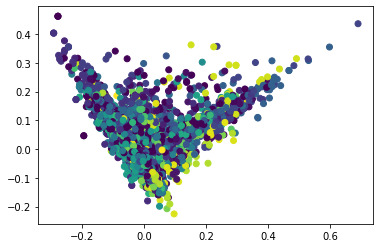

In [197]:
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=cls.labels_)

#### Metrics for clustering

In [198]:
from sklearn.metrics import silhouette_score
silhouette_score(features, labels=cls.predict(features))

0.02578089378487429

In [199]:
from sklearn.metrics import homogeneity_score
homogeneity_score(course.label, cls.predict(features))

0.4966212990260203

In [200]:
from sklearn.metrics import completeness_score
completeness_score(course.label, cls.predict(features))

0.5804336858166623

#### Recommendations

In [201]:
recommend_course('python')

,course_name,level,label,tokenized,clean_document,cluster
course_id,,,,,,
394676,Learn Python: The Complete Python Programming ...,All Levels,Python,"[learn, python, the, complete, python, program...",learn python the complete python programming c...,1
1806498,Python for beginners (Updated!),Beginner,Python,"[python, beginners, updated]",python beginners updated,1
2140668,Python Pandas and Altair Data Science & Visual...,Intermediate,Python,"[python, pandas, altair, data, science, visual...",python pandas altair data science visualizatio...,1
2430478,The Complete Python for Beginners:Master Pytho...,All Levels,Python,"[the, complete, python, beginners, master, pyt...",the complete python beginners master python sc...,1
2165344,Pandas & Seaborn Data Science and Visualizatio...,Beginner,Data Science,"[pandas, seaborn, data, science, visualization...",pandas seaborn data science visualization mast...,1


In [202]:
recommend_course('machine learning')

,course_name,level,label,tokenized,clean_document,cluster
course_id,,,,,,
1955020,Introduction to Python and Machine Learning,Beginner,Python,"[introduction, python, machine, learning]",introduction python machine learning,109
1192500,Mastering Firebase for iOS Using Swift Language,All Levels,Firebase,"[mastering, firebase, ios, using, swift, langu...",mastering firebase ios using swift language,109
1343106,Pandas for Predictive Analysis using scikit-learn,Intermediate,Pandas,"[pandas, predictive, analysis, scikit, learn]",pandas predictive analysis scikit learn,109
2466824,Machine Learning With Python: Predicting Custo...,Intermediate,Machine Learning,"[machine, learning, with, python, predicting, ...",machine learning with python predicting custom...,109
2345802,Complete Machine Learning Bootcamp,All Levels,Machine Learning,"[complete, machine, learning, bootcamp]",complete machine learning bootcamp,109


In [203]:
recommend_course('data science')

,course_name,level,label,tokenized,clean_document,cluster
course_id,,,,,,
1886862,Data Science for Professionals,Beginner,Data Science,"[data, science, professionals]",data science professionals,92
1541234,Jupyter for Data Science,Beginner,Data Science,"[jupyter, data, science]",jupyter data science,92
701764,Bite-Sized Data Science with Python and Pandas...,Intermediate,Python,"[bite, sized, data, science, python, pandas, i...",bite sized data science python pandas introduc...,92
1729498,Data Science and Analytics in R Programming,All Levels,R,"[data, science, analytics, r, programming]",data science analytics r programming,92
1526546,Crack Pandas and NumPy: Python Data Science Ma...,Beginner,Python,"[crack, pandas, numpy, python, data, science, ...",crack pandas numpy python data science made easy,92


In [204]:
recommend_course('web development')

,course_name,level,label,tokenized,clean_document,cluster
course_id,,,,,,
2078024,Build Messenger App and Charge Client for Each...,All Levels,Node.Js,"[build, messenger, app, charge, client, each, ...",build messenger app charge client each message,0
1805048,Learn To Build DevOps Pipeline On Azure Cloud,Intermediate,Microsoft Azure,"[learn, to, build, devops, pipeline, on, azure...",learn to build devops pipeline on azure cloud,0
1244888,Learn Pytest in 60 Minutes:Unit Testing Framew...,Expert,pytest,"[learn, pytest, 60, minutes, unit, testing, fr...",learn pytest 60 minutes unit testing framework...,0
128964,Master KnockoutJS : Knockout JS - JavaScript MVVM,All Levels,KnockoutJS,"[master, knockoutjs, knockout, js, javascript,...",master knockoutjs knockout js javascript mvvm,0
1567128,Create a SMS Verification with Login System Us...,All Levels,PHP,"[create, sms, verification, login, system, usi...",create sms verification login system using php...,0


In [211]:
recommend_course('computer vision')

,course_name,level,label,tokenized,clean_document,cluster
course_id,,,,,,
2269746,Python for Computer Vision: Object (Traffic Si...,All Levels,Python,"[python, computer, vision, object, traffic, si...",python computer vision object traffic sign det...,155
950614,Master Computer Vision™ OpenCV4 in Python with...,All Levels,OpenCV,"[master, computer, vision, ™, opencv4, python,...",master computer vision ™ opencv4 python deep l...,155
2461692,Python 3 Advanced Computer Vision with OpenCV ...,Intermediate,Computer Vision,"[python, 3, advanced, computer, vision, opencv...",python 3 advanced computer vision opencv sciki...,155
960228,Computer Vision with Python,Intermediate,Python,"[computer, vision, python]",computer vision python,155
1314890,Learning Computer Vision with Tensorflow,Intermediate,Computer Vision,"[learning, computer, vision, tensorflow]",learning computer vision tensorflow,155


In [1]:
from joblib import dump, load
dump(cls, 'kmeans.joblib')

NameError: name 'cls' is not defined